In [ ]:
%load_ext dotenv
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from matplotlib import pyplot
from dotenv import load_dotenv
import os

provider = QiskitRuntimeService(token=os.environ["ibm_token"], channel="ibm_quantum")

In [18]:
# Selecting a backend
# Use simulators to test before running it on real hardware.
# Simulators will be depricated on 15/05/2024 see Aer for local simulation
backend = provider.least_busy(operational=True, simulator=False, min_num_qubits=127)

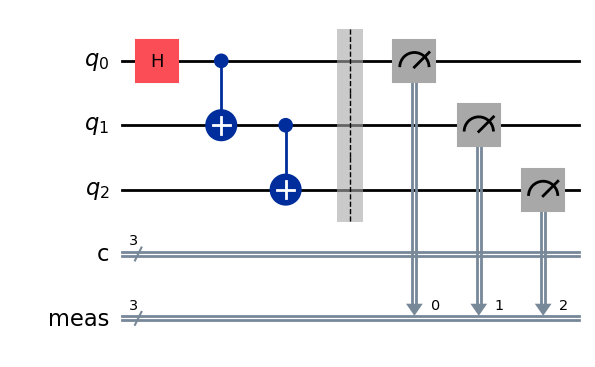

In [19]:
circ = QuantumCircuit(3, 3)
circ.name = "My First Quantum Program"
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

circ.draw('mpl')

In [ ]:
# Transpile circuit to work with the current backend.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)
# Run the job
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)

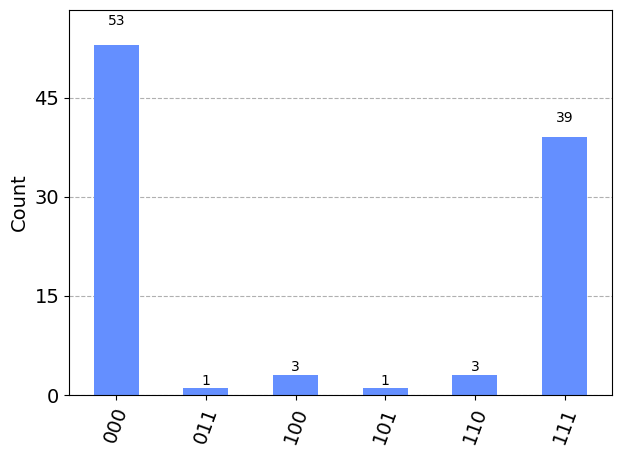

In [29]:
# Get the result
result = job.result()
counts = result[0].data.meas.get_counts()
plot_histogram(counts)